To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Colab instance!
<div class="align-center">
<a href="https://unsloth.ai/"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
<a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord button.png" width="145"></a>
<a href="https://unsloth.ai/docs/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a> Join Discord if you need help + ⭐ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐
</div>

To install Unsloth on your local device, follow [our guide](https://unsloth.ai/docs/get-started/install-and-update). This notebook is licensed [LGPL-3.0](https://github.com/unslothai/notebooks?tab=LGPL-3.0-1-ov-file#readme).

You will learn how to do [data prep](#Data), how to [train](#Train), how to [run the model](#Inference), & [how to save it](#Save)


### News


New 3x faster training & 30% less VRAM. New kernels, padding-free & packing. [Blog](https://unsloth.ai/docs/new/3x-faster-training-packing)

You can now train with 500K context windows on a single 80GB GPU. [Blog](https://unsloth.ai/docs/new/500k-context-length-fine-tuning)

Unsloth's [Docker image](https://hub.docker.com/r/unsloth/unsloth) is here! Start training with no setup & environment issues. [Read our Guide](https://unsloth.ai/docs/new/how-to-train-llms-with-unsloth-and-docker).

New in Reinforcement Learning: [FP8 RL](https://unsloth.ai/docs/new/fp8-reinforcement-learning) • [Vision RL](https://unsloth.ai/docs/new/vision-reinforcement-learning-vlm-rl) • [Standby](https://unsloth.ai/docs/basics/memory-efficient-rl) (faster, less VRAM RL) • [gpt-oss RL](https://unsloth.ai/docs/new/gpt-oss-reinforcement-learning)

Visit our docs for all our [model uploads](https://unsloth.ai/docs/get-started/all-our-models) and [notebooks](https://unsloth.ai/docs/get-started/unsloth-notebooks).


### Installation

In [ ]:
%%capture
import os, re
if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth  # Do this in local & cloud setups
else:
    import torch; v = re.match(r'[\d]{1,}\.[\d]{1,}', str(torch.__version__)).group(0)
    xformers = 'xformers==' + {'2.9':'0.0.33.post1','2.8':'0.0.32.post2'}.get(v, "0.0.33.post1")
    !pip install sentencepiece protobuf "datasets==4.3.0" "huggingface_hub>=0.34.0" hf_transfer
    !pip install --no-deps unsloth_zoo bitsandbytes accelerate {xformers} peft trl triton unsloth
!pip install transformers==4.56.2 && pip install --no-deps trl==0.22.2
!pip install decord

### Unsloth

In [ ]:
from unsloth import FastVisionModel # FastLanguageModel for LLMs
import torch
from transformers import AutoModelForCausalLM ,AutoProcessor
# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Qwen3-VL-8B-Instruct-bnb-4bit", # Qwen 3 vision support
    "unsloth/Qwen3-VL-8B-Thinking-bnb-4bit",
    "unsloth/Qwen3-VL-32B-Instruct-bnb-4bit",
    "unsloth/Qwen3-VL-32B-Thinking-bnb-4bit",
] # More models at https://huggingface.co/unsloth

model_path = "unsloth/ERNIE-4.5-VL-28B-A3B-PT"
model, tokenizer = FastVisionModel.from_pretrained(
    model_path,
    auto_model = AutoModelForCausalLM,
    load_in_4bit = False, # Unsupported for this specific model variant
    trust_remote_code = True,
    unsloth_force_compile = True,
    use_gradient_checkpointing = False,
    attn_implementation = "eager"
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


A new version of the following files was downloaded from https://huggingface.co/unsloth/ERNIE-4.5-VL-28B-A3B-PT:
- configuration_ernie4_5_vl.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Unsloth: WARNING `trust_remote_code` is True.
Are you certain you want to do remote code execution?
==((====))==  Unsloth 2025.11.3: Fast Dfnrope_Vision_Transformer patching. Transformers: 4.56.2.
   \\   /|    NVIDIA A100-SXM4-80GB. Num GPUs = 1. Max memory: 79.318 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.9.0+cu126. CUDA: 8.0. CUDA Toolkit: 12.6. Triton: 3.5.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.33.post1. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: QLoRA and full finetuning all not selected. Switching to 16bit LoRA.


modeling_ernie4_5_vl.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/unsloth/ERNIE-4.5-VL-28B-A3B-PT:
- modeling_ernie4_5_vl.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

model-00001-of-00012.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00012.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00003-of-00012.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00012.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00005-of-00012.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00006-of-00012.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00007-of-00012.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00008-of-00012.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00009-of-00012.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00010-of-00012.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00011-of-00012.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00012-of-00012.safetensors:   0%|          | 0.00/3.88G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/12 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

The repository unsloth/ERNIE-4.5-VL-28B-A3B-PT contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/unsloth/ERNIE-4.5-VL-28B-A3B-PT .
 You can inspect the repository content at https://hf.co/unsloth/ERNIE-4.5-VL-28B-A3B-PT.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


processing_ernie4_5_vl.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/unsloth/ERNIE-4.5-VL-28B-A3B-PT:
- processing_ernie4_5_vl.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer.model:   0%|          | 0.00/1.61M [00:00<?, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

We now load the processor

In [ ]:
processor = AutoProcessor.from_pretrained(model_path, trust_remote_code = True)
processor.eval()
model.add_image_preprocess(processor)

processor_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

chat_template.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/823 [00:00<?, ?B/s]

We now add LoRA adapters for parameter efficient finetuning - this allows us to only efficiently train 1% of all parameters.

**[NEW]** We also support finetuning ONLY the vision part of the model, or ONLY the language part. Or you can select both! You can also select to finetune the attention or the MLP layers!

In [ ]:
model = FastVisionModel.get_peft_model(
    model,
    r = 8,
    lora_alpha = 16,
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,
    target_modules = [
        "q_proj", "k_proj", "v_proj", "o_proj",
        "gate_proj", "up_proj", "down_proj",
        "fc1", "fc2",
    ]
)

Unsloth: Making `model.base_model.model.model` require gradients


<a name="Data"></a>
### Data Prep
We'll be using a sampled dataset of handwritten maths formulas. The goal is to convert these images into a computer readable form - ie in LaTeX form, so we can render it. This can be very useful for complex formulas.

You can access the dataset [here](https://huggingface.co/datasets/unsloth/LaTeX_OCR). The full dataset is [here](https://huggingface.co/datasets/linxy/LaTeX_OCR).

In [ ]:
from datasets import load_dataset
dataset = load_dataset("unsloth/LaTeX_OCR", split = "train")

README.md:   0%|          | 0.00/519 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/344M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/38.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/68686 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7632 [00:00<?, ? examples/s]

Let's take an overview look at the dataset. We shall see what the 3rd image is, and what caption it had.

In [ ]:
dataset

Dataset({
    features: ['image', 'text'],
    num_rows: 68686
})

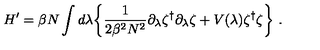

In [ ]:
dataset[2]["image"]

In [ ]:
dataset[2]["text"]

'H ^ { \\prime } = \\beta N \\int d \\lambda \\biggl \\{ \\frac { 1 } { 2 \\beta ^ { 2 } N ^ { 2 } } \\partial _ { \\lambda } \\zeta ^ { \\dagger } \\partial _ { \\lambda } \\zeta + V ( \\lambda ) \\zeta ^ { \\dagger } \\zeta \\biggr \\} \\ .'

We can also render the LaTeX in the browser directly!

In [ ]:
from IPython.display import display, Math, Latex

latex = dataset[2]["text"]
display(Math(latex))

<IPython.core.display.Math object>

To format the dataset, all vision finetuning tasks should be formatted as follows:

```python
[
{ "role": "user",
  "content": [{"type": "text",  "text": Q}, {"type": "image", "image": image} ]
},
{ "role": "assistant",
  "content": [{"type": "text",  "text": A} ]
},
]
```

In [ ]:
instruction = "Write the LaTeX representation for this image."

def convert_to_conversation(sample):
    conversation = [
        { "role": "user",
          "content" : [
            {"type" : "text",  "text"  : instruction},
            {"type" : "image", "image" : sample["image"]} ]
        },
        { "role" : "assistant",
          "content" : [
            {"type" : "text",  "text"  : sample["text"]} ],
            "reasoning_content": "\n" # If you leave this as "\n", you train the model to output empty thoughts.
        },
    ]
    return { "messages" : conversation }

Let's convert the dataset into the "correct" format for finetuning:

In [ ]:
converted_dataset = [convert_to_conversation(sample) for sample in dataset]

We look at how the conversations are structured for the first example:

In [ ]:
converted_dataset[0]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'Write the LaTeX representation for this image.'},
    {'type': 'image',
     'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=160x40>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': '{ \\frac { N } { M } } \\in { \\bf Z } , { \\frac { M } { P } } \\in { \\bf Z } , { \\frac { P } { Q } } \\in { \\bf Z }'}],
   'reasoning_content': '\n'}]}

Let's first see before we do any finetuning what the model outputs for the first example!

In [ ]:
FastVisionModel.for_inference(model) # Enable for inference!

image = dataset[2]["image"]

instruction = "Write the LaTeX representation for this image."
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"}, # Placeholder required for the template
            {"type": "text", "text": instruction}
        ]
    }
]
text_prompt = processor.tokenizer.apply_chat_template(
    messages,
    tokenize = False,
    add_generation_prompt = True,
    enable_thinking = False
)
inputs = processor(
    text = [text_prompt],
    images = [image],
    videos = [],
    padding = True,
    return_tensors = "pt",
)

# Move inputs to GPU
device = next(model.parameters()).device
inputs = inputs.to(device)

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = False, temperature = 1.5, min_p = 0.1)

The LaTeX code for the Hamiltonian in the image is:
H'=\beta N\int d\lambda\left\{\frac{1}{2\beta^{2}N^{2}}\partial_{\xi}\lambda^{\dagger}\partial_{\xi}\lambda+V(\lambda)\zeta^{\dagger}\zeta\right\}~.</s>


In [ ]:
# @title Setup Collator & Trainer

from trl import SFTTrainer, SFTConfig
import torch
import torch.nn as nn
from dataclasses import dataclass, field
from typing import Any, Dict, List, Optional, Union

@dataclass
class ErnieVisionDataCollator:
    processor: Any
    tokenizer: Any
    ignore_index: int = -100
    max_seq_length: int = 2048
    train_on_responses_only: bool = False

    _img_patch_id: int = field(init = False, default = -1)

    def __post_init__(self):
        if self.tokenizer.pad_token_id is None:
            self.tokenizer.pad_token_id = 0
        patch_token = "<|IMAGE_PLACEHOLDER|>"
        converted_id = self.tokenizer.convert_tokens_to_ids(patch_token)
        self._img_patch_id = converted_id if converted_id is not None else -1

    def _extract_visuals(self, msgs: List[Dict]) -> tuple:
        image_inputs, video_inputs = [], []
        needs_extraction = False

        for msg in msgs:
            content = msg.get("content", [])
            if isinstance(content, list):
                for part in content:
                    if isinstance(part, dict):
                        if "image" in part:
                            image_inputs.append(part["image"])
                        elif part.get("type") in ["image_url", "video_url"]:
                            needs_extraction = True

        if needs_extraction and not image_inputs:
            try:
                return self.processor.process_vision_info(msgs)
            except Exception:
                return [], []

        return image_inputs, video_inputs

    def _mask_prompt(self, msgs: List[Dict], image_inputs: List, labels: torch.Tensor, full_input_ids: torch.Tensor) -> torch.Tensor:
        last_asst_idx = -1
        for i in range(len(msgs) - 1, -1, -1):
            if msgs[i]['role'] == 'assistant':
                last_asst_idx = i
                break

        if last_asst_idx == -1:
            return labels

        prompt_msgs = msgs[:last_asst_idx]
        prompt_text = self.tokenizer.apply_chat_template(
            prompt_msgs, tokenize = False, add_generation_prompt = True, enable_thinking = False
        )

        prompt_inputs = self.processor(
            text = [prompt_text],
            images = image_inputs,
            return_tensors = "pt"
        )

        prompt_ids = prompt_inputs['input_ids'][0]

        len_full = full_input_ids.size(0)
        len_prompt = prompt_ids.size(0)
        limit = min(len_full, len_prompt)

        matches = (full_input_ids[:limit] == prompt_ids[:limit])

        mismatches = (~matches).nonzero(as_tuple = False)

        if len(mismatches) > 0:
            mask_len = mismatches[0].item()
        else:
            mask_len = limit

        labels[:mask_len] = self.ignore_index

        return labels

    def __call__(self, features: List[Dict[str, Any]]) -> Dict[str, torch.Tensor]:
        batch = {k: [] for k in ["input_ids", "labels", "token_type_ids", "position_ids", "images", "grid_thw", "image_type_ids"]}

        for example in features:
            msgs = example.get("messages", example.get("conversations", []))
            image_inputs, video_inputs = self._extract_visuals(msgs)

            text = self.tokenizer.apply_chat_template(
                msgs, tokenize = False, add_generation_prompt = False
            )

            inputs = self.processor(
                text = [text],
                images = image_inputs,
                videos = video_inputs,
                return_tensors = "pt"
            )

            input_ids = inputs['input_ids'][0]
            tt = inputs['token_type_ids'][0]
            pos = inputs['position_ids'][0]

            if input_ids[-1] != self.tokenizer.eos_token_id:
                input_ids = torch.cat([input_ids, torch.tensor([self.tokenizer.eos_token_id])])
                tt = torch.cat([tt, torch.tensor([0], dtype = tt.dtype)])
                pos = torch.cat([pos, (pos[-1] + 1).unsqueeze(0)])

            labels = input_ids.clone()


            if self._img_patch_id != -1:
                labels[labels == self._img_patch_id] = self.ignore_index

            if self.train_on_responses_only:
                labels = self._mask_prompt(msgs, image_inputs, labels, input_ids)

            batch["input_ids"].append(input_ids)
            batch["labels"].append(labels)
            batch["token_type_ids"].append(torch.cat([tt, torch.tensor([0])]))
            batch["position_ids"].append(pos)

            if inputs.get('images') is not None: batch["images"].append(inputs['images'])
            if inputs.get('grid_thw') is not None: batch["grid_thw"].append(inputs['grid_thw'])
            if inputs.get('image_type_ids') is not None: batch["image_type_ids"].append(inputs['image_type_ids'])

        padded_input = torch.nn.utils.rnn.pad_sequence(batch["input_ids"], batch_first = True, padding_value = self.tokenizer.pad_token_id)
        padded_label = torch.nn.utils.rnn.pad_sequence(batch["labels"], batch_first = True, padding_value = self.ignore_index)
        padded_tt = torch.nn.utils.rnn.pad_sequence(batch["token_type_ids"], batch_first = True, padding_value = 0)

        max_len = padded_input.shape[1]
        padded_pos = torch.zeros((len(batch["position_ids"]), max_len, 3), dtype = torch.long)
        for i, p in enumerate(batch["position_ids"]):
            l = min(p.shape[0], max_len)
            padded_pos[i, :l, :] = p[:l]

        if padded_input.shape[1] > self.max_seq_length:
            padded_input = padded_input[:, :self.max_seq_length]
            padded_label = padded_label[:, :self.max_seq_length]
            padded_pos = padded_pos[:, :self.max_seq_length, :]
            padded_tt = padded_tt[:, :self.max_seq_length + 1]

        final_batch = {
            "input_ids": padded_input,
            "labels": padded_label,
            "attention_mask": padded_input.ne(self.tokenizer.pad_token_id).long(),
            "token_type_ids": padded_tt,
            "position_ids": padded_pos,
        }

        if batch["images"]: final_batch["images"] = torch.cat(batch["images"], dim = 0)
        if batch["grid_thw"]: final_batch["grid_thw"] = torch.cat(batch["grid_thw"], dim = 0)
        if batch["image_type_ids"]: final_batch["image_type_ids"] = torch.cat(batch["image_type_ids"], dim = 0)

        return final_batch

class ErnieSFTTrainer(SFTTrainer):
    def compute_loss(self, model, inputs, return_outputs = False, num_items_in_batch = None):
        outputs = model(**inputs)

        logits = outputs.logits
        labels = inputs.get("labels")

        loss = None
        if labels is not None:

            shift_logits = logits[..., :-1, :].contiguous()
            shift_labels = labels[..., 1:].contiguous()

            loss_fct = nn.CrossEntropyLoss()
            shift_logits = shift_logits.view(-1, self.model.config.vocab_size)
            shift_labels = shift_labels.view(-1)

            loss = loss_fct(shift_logits, shift_labels)

            if hasattr(outputs, "router_loss") and outputs.router_loss is not None:
                aux_loss = outputs.router_loss.to(loss.device)
                loss += aux_loss

        if return_outputs:
            return (loss, outputs)
        return loss

<a name="Train"></a>
### Train the model
Now let's train our model. We do 30 steps to speed things up, but you can set `num_train_epochs=1` for a full run, and turn off `max_steps=None`. We also support `DPOTrainer` and `GRPOTrainer` for reinforcement learning!!

We use our new `ErnieVisionDataCollator` which will help in our vision finetuning setup.

In [ ]:
from trl import  SFTConfig

FastVisionModel.for_training(model) # Enable for training!

custom_collator = ErnieVisionDataCollator(
    processor = processor,
    tokenizer = tokenizer,
    max_seq_length = 2048,
    train_on_responses_only = True,
)

trainer = ErnieSFTTrainer(
    model = model,
    tokenizer = processor.tokenizer,
    data_collator = custom_collator,
    train_dataset = converted_dataset,
    args = SFTConfig(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 2,
        warmup_steps = 5,
        max_steps = 30,
        learning_rate = 2e-4,
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.001,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none",
        gradient_checkpointing = False,
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        max_length = 2048,
        fp16 = not torch.cuda.is_bf16_supported(),
        bf16 = torch.cuda.is_bf16_supported(),
    ),
)


In [ ]:
# @title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = NVIDIA A100-SXM4-80GB. Max memory = 79.318 GB.
56.051 GB of memory reserved.


In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 68,686 | Num Epochs = 1 | Total steps = 30
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 2
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 2 x 1) = 4
 "-____-"     Trainable parameters = 308,224,000 of 29,707,518,336 (1.04% trained)
Could not estimate the number of tokens of the input, floating-point operations will not be computed


Step,Training Loss
1,2.039000
2,2.360200
3,1.705200
4,3.301600
5,1.836600
6,1.906900
7,0.610100
8,0.609500
9,0.671800
10,0.193100


In [ ]:
# @title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory / max_memory * 100, 3)
lora_percentage = round(used_memory_for_lora / max_memory * 100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(
    f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training."
)
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

755.0562 seconds used for training.
12.58 minutes used for training.
Peak reserved memory = 62.695 GB.
Peak reserved memory for training = 6.644 GB.
Peak reserved memory % of max memory = 79.043 %.
Peak reserved memory for training % of max memory = 8.376 %.


<a name="Inference"></a>
### Inference
Let's run the model! You can change the instruction and input - leave the output blank!

We use `min_p = 0.1` and `temperature = 1.5`. Read this [Tweet](https://x.com/menhguin/status/1826132708508213629) for more information on why.

In [ ]:
FastVisionModel.for_inference(model) # Enable for inference!

image = dataset[2]["image"]

instruction = "Write the LaTeX representation for this image."
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"}, # Placeholder required for the template
            {"type": "text", "text": instruction}
        ]
    }
]
text_prompt = processor.tokenizer.apply_chat_template(
    messages,
    tokenize = False,
    add_generation_prompt = True,
    enable_thinking = False
)
inputs = processor(
    text = [text_prompt],
    images = [image],
    videos = [],
    padding = True,
    return_tensors = "pt",
)

# Move inputs to GPU
device = next(model.parameters()).device
inputs = inputs.to(device)

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = False, temperature = 1.5, min_p = 0.1)

H ^ { \prime } = \beta N \int d \lambda \left\{ \frac { 1 } { 2 \beta ^ { 2 } N ^ { 2 } } \partial _ { \lambda } \zeta ^ { \dagger } \partial _ { \lambda } \zeta + V ( \lambda ) \zeta ^ { \dagger } \zeta \right\} \ .<|end_of_sentence|>


<a name="Save"></a>
### Saving, loading finetuned models
To save the final model as LoRA adapters, either use Huggingface's `push_to_hub` for an online save or `save_pretrained` for a local save.

**[NOTE]** This ONLY saves the LoRA adapters, and not the full model. To save to 16bit or GGUF, scroll down!

In [ ]:
model.save_pretrained("ernie_lora")  # Local saving
tokenizer.save_pretrained("ernie_lora")
# model.push_to_hub("your_name/ernie_lora", token = "YOUR_HF_TOKEN") # Online saving
# tokenizer.push_to_hub("your_name/ernie_lora", token = "YOUR_HF_TOKEN") # Online saving

('lora_model/tokenizer_config.json',
 'lora_model/special_tokens_map.json',
 'lora_model/chat_template.jinja',
 'lora_model/tokenizer.model',
 'lora_model/added_tokens.json')

Now if you want to load the LoRA adapters we just saved for inference, set `False` to `True`:

In [ ]:
if False:
    from unsloth import FastVisionModel
    model, tokenizer = FastVisionModel.from_pretrained(
        model_name = "ernie_lora", # YOUR MODEL YOU USED FOR TRAINING
        load_in_4bit = False, # Set to False for 16bit LoRA
    )
    FastVisionModel.for_inference(model) # Enable for inference!


from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = False, temperature = 1.5, min_p = 0.1)

### Saving to float16 for VLLM

We also support saving to `float16` directly. Select `merged_16bit` for float16. Use `push_to_hub_merged` to upload to your Hugging Face account! You can go to https://huggingface.co/settings/tokens for your personal tokens. See [our docs](https://unsloth.ai/docs/basics/inference-and-deployment) for more deployment options.

In [ ]:
# Select ONLY 1 to save! (Both not needed!)

# Save locally to 16bit
if False: model.save_pretrained_merged("unsloth_finetune", tokenizer,)

# To export and save to your Hugging Face account
if False: model.push_to_hub_merged("YOUR_USERNAME/unsloth_finetune", tokenizer, token = "YOUR_HF_TOKEN")

And we're done! If you have any questions on Unsloth, we have a [Discord](https://discord.gg/unsloth) channel! If you find any bugs or want to keep updated with the latest LLM stuff, or need help, join projects etc, feel free to join our Discord!

Some other resources:
1. Looking to use Unsloth locally? Read our [Installation Guide](https://unsloth.ai/docs/get-started/install-and-update) for details on installing Unsloth on Windows, Docker, AMD, Intel GPUs.
2. Learn how to do Reinforcement Learning with our [RL Guide and notebooks](https://unsloth.ai/docs/get-started/reinforcement-learning-rl-guide).
3. Read our guides and notebooks for [Text-to-speech (TTS)](https://unsloth.ai/docs/basics/text-to-speech-tts-fine-tuning) and [vision](https://unsloth.ai/docs/basics/vision-fine-tuning) model support.
4. Explore our [LLM Tutorials Directory](https://unsloth.ai/docs/models/tutorials-how-to-fine-tune-and-run-llms) to find dedicated guides for each model.
5. Need help with Inference? Read our [Inference & Deployment page](https://unsloth.ai/docs/basics/inference-and-deployment) for details on using vLLM, llama.cpp, Ollama etc.

<div class="align-center">
  <a href="https://unsloth.ai"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
  <a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord.png" width="145"></a>
  <a href="https://unsloth.ai/docs/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a>

  Join Discord if you need help + ⭐️ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐️

  This notebook and all Unsloth notebooks are licensed [LGPL-3.0](https://github.com/unslothai/notebooks?tab=LGPL-3.0-1-ov-file#readme)
</div>
